In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data and initialize
chips = pd.read_csv(r'E:\task 3\chips.csv')
geyser = pd.read_csv(r'E:\task 3\geyser.csv')

chips['class'].replace({"P": 1, "N": -1}, inplace=True)
geyser['class'].replace({"P": 1, "N": -1}, inplace=True)

# divide train set and test set
y_chips = chips['class']
y_geyser = geyser['class']

X_chips = chips.drop(columns="class")
X_geyser = geyser.drop(columns="class")

X_chips_train, X_chips_test, y_chips_train, y_chips_test = train_test_split(X_chips, y_chips, test_size=0.2, random_state=42)
X_geyser_train, X_geyser_test, y_geyser_train, y_geyser_test = train_test_split(X_geyser, y_geyser, test_size=0.2, random_state=42)


1. Take the ‘geyser.csv’ for the classification task. Split it on train and test parts.Train the model SGDClassifier on it. To do it, you should convert labels to numbers, where a positive class (P) will be encoded by ‘+1’, and a negative (N) by ‘-1’. Print the resulting equation of the separating line. f(x) = w_1 * x_ 1 + w_2 * x_2 .....Consider ‘chips.csv’. Also split it on train and test parts. Do the same things.
Evaluate classifiers with F1 score . Compare the resluts (F1 scores)

In [3]:
# use SGD
sgd_geyser=SGDClassifier(random_state=42)
sgd_geyser.fit(X_geyser_train,y_geyser_train)
#print resulting equation of the separating line
coef_geyser = sgd_geyser.coef_[0]
intercept_geyser = sgd_geyser.intercept_[0]

equation = ' f(x) = '
for i in range(len(coef_geyser)):
    equation += f' {coef_geyser[i]} * x{i+1} +'
equation += f' {intercept_geyser}'
print('geyser function',equation)
#import chips
sgd_chips=SGDClassifier(random_state=42)
sgd_chips.fit(X_chips_train,y_chips_train)

coef_chips = sgd_chips.coef_[0]
intercept_chips = sgd_chips.intercept_[0]

equation = ' f(x) = '
for i in range(len(coef_chips)):
    equation += f' {coef_chips[i]} * x{i+1} +'
equation += f' {intercept_chips}'
print('geyser function',equation)

y_geyser_pre=sgd_geyser.predict(X_geyser_test)
y_chips_pre=sgd_chips.predict(X_chips_test)

f1_score_chips=f1_score(y_chips_test,y_chips_pre, average='binary')
f1_score_geyser=f1_score(y_geyser_test,y_geyser_pre, average='binary')

print ('chips_f1:',f1_score_chips)
print('geyser_f1:',f1_score_geyser)
com_result='geyser is good'if f1_score_chips>f1_score_geyser else 'chips is good'
print(com_result)

geyser function  f(x) =  1.356668023334763 * x1 + -226.42789309456018 * x2 + 843.7423231991912
geyser function  f(x) =  2.954737975109328 * x1 + 3.3098015472586666 * x2 + 3.0408687453258167
chips_f1: 0.6666666666666666
geyser_f1: 0.8666666666666667
chips is good


2.For both datasets (‘chips.csv’ and ‘geyser.csv’), do the train and test split and apply the SVM model on them. Try different kernels. For each kernel, find the best parameter C for it and draw how the SVM model classify whole space with it. You can find an example here (notebook in the attachment).Compare the SVM results (by F1 score).

{'rbf': 1, 'poly': 0.1, 'linear': 1, 'sigmoid': 0.1}
{'rbf': 1, 'poly': 10, 'linear': 0.01, 'sigmoid': 100}


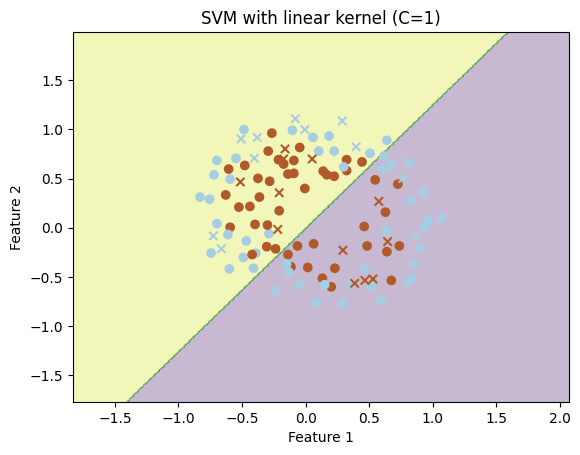

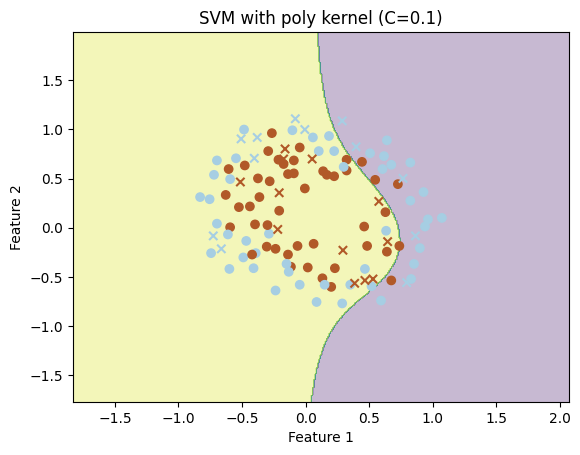

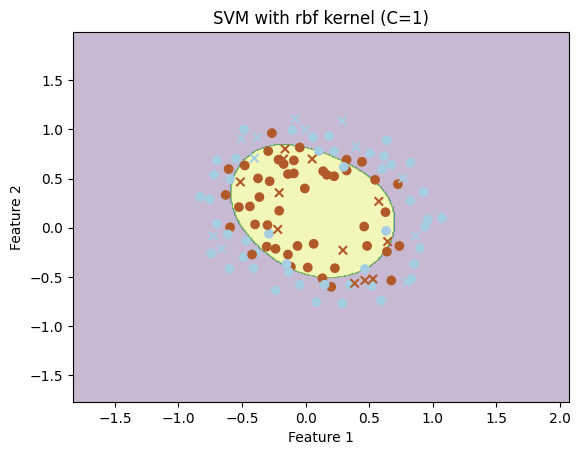

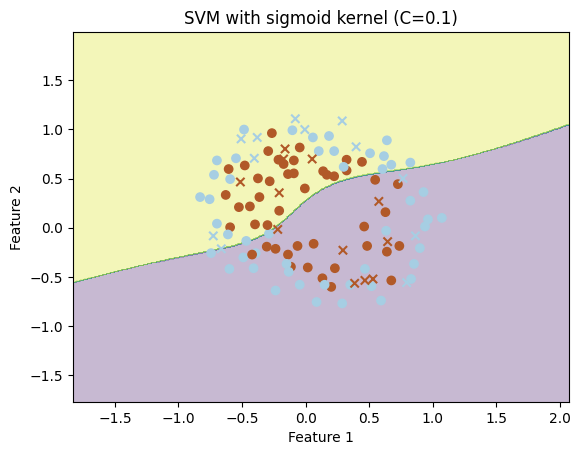

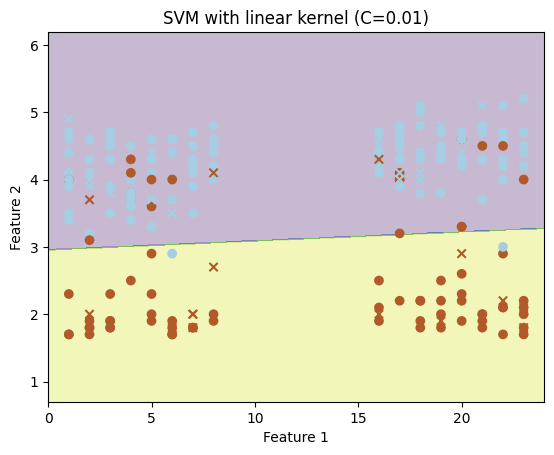

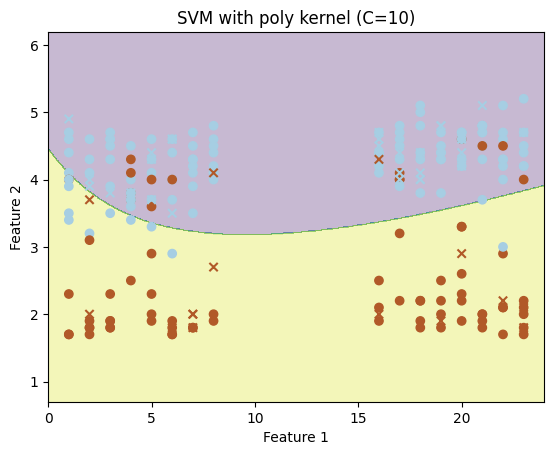

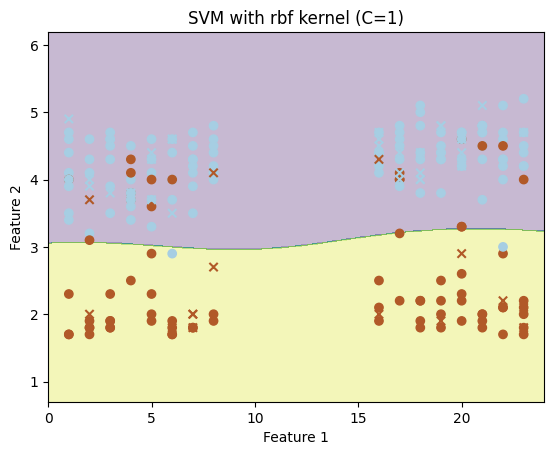

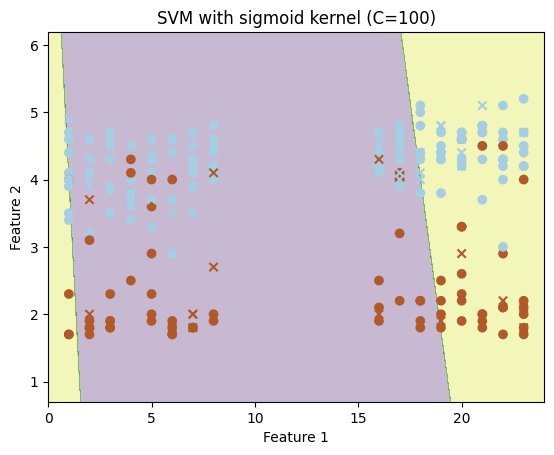

In [4]:
kernel = {'linear', 'poly', 'rbf', 'sigmoid'}
C_values = [0.01, 0.1, 1, 10, 100]

def svm_search(svm_k, c_value, X_train, y_train, X_test, y_test):
    svm_model = SVC(kernel=svm_k, C=c_value)
    svm_model.fit(X_train, y_train)
    svm_pre = svm_model.predict(X_test)
    svm_f1 = f1_score(y_test, svm_pre, average='binary')
    return svm_f1

def best_combination(X_train, y_train, X_test, y_test):
   
    best_params = {}
    best_f1_score = -float('inf')
    
    for k in kernel:
        best_params[k] = -float('inf')
        for C in C_values:
            f1 = svm_search(k, C, X_train, y_train, X_test, y_test)
            if f1 > best_f1_score:
                best_f1_score = f1
                best_params[k] = C
        best_f1_score = -float('inf')             
    return best_params

def plot_svm_boundary(X_train, y_train, X_test, y_test, kernel, C):
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Fit the SVM model with the best parameters
    svm_model = SVC(kernel=kernel, C=C)
    svm_model.fit(X_train, y_train)
    
    # Predict the classes for the meshgrid points
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM with {kernel} kernel (C={C})')
    plt.show()

#look up combination
chips_best_params = best_combination(X_chips_train, y_chips_train, X_chips_test, y_chips_test)
geyser_best_params = best_combination(X_geyser_train, y_geyser_train, X_geyser_test, y_geyser_test)
print(chips_best_params)
print (geyser_best_params)
#Convert data types to fit functions
X_chips_train_np = X_chips_train.values
X_chips_test_np = X_chips_test.values
y_chips_train_np = y_chips_train.values
y_chips_test_np = y_chips_test.values
X_geyser_train_np = X_geyser_train.values
X_geyser_test_np = X_geyser_test.values
y_geyser_train_np = y_geyser_train.values
y_geyser_test_np = y_geyser_test.values

#Plot the optimal C value for each k function
plot_svm_boundary(X_chips_train_np, y_chips_train_np, X_chips_test_np, y_chips_test_np, 'linear', chips_best_params['linear'])
plot_svm_boundary(X_chips_train_np, y_chips_train_np, X_chips_test_np, y_chips_test_np, 'poly', chips_best_params['poly'])
plot_svm_boundary(X_chips_train_np, y_chips_train_np, X_chips_test_np, y_chips_test_np, 'rbf', chips_best_params['rbf'])
plot_svm_boundary(X_chips_train_np, y_chips_train_np, X_chips_test_np, y_chips_test_np, 'sigmoid', chips_best_params['sigmoid'])

plot_svm_boundary(X_geyser_train_np, y_geyser_train_np, X_geyser_test_np, y_geyser_test_np, 'linear', geyser_best_params['linear'])
plot_svm_boundary(X_geyser_train_np, y_geyser_train_np, X_geyser_test_np, y_geyser_test_np, 'poly', geyser_best_params['poly'])
plot_svm_boundary(X_geyser_train_np, y_geyser_train_np, X_geyser_test_np, y_geyser_test_np, 'rbf', geyser_best_params['rbf'])
plot_svm_boundary(X_geyser_train_np, y_geyser_train_np, X_geyser_test_np, y_geyser_test_np, 'sigmoid', geyser_best_params['sigmoid'])

In [5]:
#Output optimal F1 combination
for k in kernel:
    chips_best_f1 = svm_search(k, chips_best_params[k], X_chips_train_np, y_chips_train_np, X_chips_test_np, y_chips_test_np)
    geyser_best_f1 = svm_search(k, geyser_best_params[k], X_geyser_train_np, y_geyser_train_np, X_geyser_test_np, y_geyser_test_np)
    print('chips_f1:', chips_best_f1, ' in', k, 'with C', chips_best_params[k])
    print('geyser_f1:', geyser_best_f1, ' in', k, 'with C', geyser_best_params[k])

chips_f1: 0.8181818181818182  in rbf with C 1
geyser_f1: 0.888888888888889  in rbf with C 1
chips_f1: 0.7741935483870968  in poly with C 0.1
geyser_f1: 0.9285714285714286  in poly with C 10
chips_f1: 0.4444444444444445  in linear with C 1
geyser_f1: 0.888888888888889  in linear with C 0.01
chips_f1: 0.4  in sigmoid with C 0.1
geyser_f1: 0.3448275862068965  in sigmoid with C 100
